In [3]:
print(__doc__)

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy  
from scipy import linalg

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale  
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import itertools

from sklearn import mixture


style.use("ggplot")
%matplotlib inline



Automatically created module for IPython interactive environment


In [8]:
#dataset2
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data3_income census/adult.csv')
#age: numeric
#fnlwgt: numeric
#delete education because education number is repeating to this feature
#education_num: numeric
#capital_gain:numeric
#capital_loss:numeric
#hours_per_week:numeric
#native_country: has too many non-numeric values, delete
data=raw_data
data.drop
data['age']=raw_data.age
data['age']=data.age.astype(int)
data['fnlwgt']=raw_data.fnlwgt
data['fnlwgt']=data.fnlwgt.astype(int)
data['education_num']=raw_data.education_num
data['education_num']=data.education_num.astype(int)
data['capital_gain']=raw_data.capital_gain
data['capital_gain']=data.capital_gain.astype(int)
data['capital_loss']=raw_data.capital_loss
data['capital_loss']=data.capital_loss.astype(int)
data['hours_per_week']=raw_data.hours_per_week
data['hours_per_week']=data.hours_per_week.astype(int)

#convert workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
raw_data['workclass'] = raw_data.workclass.str.replace('Without-pay','0')
raw_data['workclass'] = raw_data.workclass.str.replace('Never-worked','1')
raw_data['workclass'] = raw_data.workclass.str.replace('Private','2')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-not-inc','3')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-inc','4')
raw_data['workclass'] = raw_data.workclass.str.replace('Federal-gov','5')
raw_data['workclass'] = raw_data.workclass.str.replace('Local-gov','6')
raw_data['workclass'] = raw_data.workclass.str.replace('State-gov','7')
raw_data['workclass'] = raw_data.workclass.str.replace('?','8')

data['workclass']=raw_data.workclass
data['workclass']=data.workclass.astype(int)

#convert marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse 
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-civ-spouse','0')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Divorced','1')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Never-married','2')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Separated','3')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Widowed','4')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-spouse-absent','5')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-AF-spouse','6')
data['marital_status']=raw_data.marital_status
data['marital_status']=data.marital_status.astype(int)

#convert occupation:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, 
#Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, 
#Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, 
#Armed-Forces
raw_data['occupation'] = raw_data.occupation.str.replace('Tech-support','0')
raw_data['occupation'] = raw_data.occupation.str.replace('Craft-repair','1')
raw_data['occupation'] = raw_data.occupation.str.replace('Other-service','2')
raw_data['occupation'] = raw_data.occupation.str.replace('Sales','3')
raw_data['occupation'] = raw_data.occupation.str.replace('Exec-managerial','4')
raw_data['occupation'] = raw_data.occupation.str.replace('Prof-specialty','5')
raw_data['occupation'] = raw_data.occupation.str.replace('Handlers-cleaners','6')
raw_data['occupation'] = raw_data.occupation.str.replace('Machine-op-inspct','7')
raw_data['occupation'] = raw_data.occupation.str.replace('Adm-clerical','8')
raw_data['occupation'] = raw_data.occupation.str.replace('Farming-fishing','9')
raw_data['occupation'] = raw_data.occupation.str.replace('Transport-moving','10')
raw_data['occupation'] = raw_data.occupation.str.replace('Priv-house-serv','11')
raw_data['occupation'] = raw_data.occupation.str.replace('Protective-serv','12')
raw_data['occupation'] = raw_data.occupation.str.replace('Armed-Forces','13')
raw_data['occupation'] = raw_data.occupation.str.replace('?','14')

data['occupation']=raw_data.occupation
data['occupation']=data.occupation.astype(int)

#relationship:Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
raw_data['relationship'] = raw_data.relationship.str.replace('Wife','0')
raw_data['relationship'] = raw_data.relationship.str.replace('Own-child','1')
raw_data['relationship'] = raw_data.relationship.str.replace('Husband','2')
raw_data['relationship'] = raw_data.relationship.str.replace('Not-in-family','3')
raw_data['relationship'] = raw_data.relationship.str.replace('Other-relative','4')
raw_data['relationship'] = raw_data.relationship.str.replace('Unmarried','5')
data['relationship']=raw_data.relationship
data['relationship']=data.relationship.astype(int)

#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
raw_data['race'] = raw_data.race.str.replace('White','0')
raw_data['race'] = raw_data.race.str.replace('Asian-Pac-Islander','1')
raw_data['race'] = raw_data.race.str.replace('Amer-Indian-Eskimo','2')
raw_data['race'] = raw_data.race.str.replace('Other','3')
raw_data['race'] = raw_data.race.str.replace('Black','4')
data['race']=raw_data.race
data['race']=data.race.astype(int)

#sex: Female, Male
raw_data['sex'] = raw_data.sex.str.replace('Female','0')
raw_data['sex'] = raw_data.sex.str.replace('Male','1')
data['sex']=raw_data.sex
data['sex']=data.sex.astype(int)

#set label_name column
data['income_name'] = raw_data.income

#income: >50K, <=50K
raw_data['income'] = raw_data.income.str.replace('>50K','1')
raw_data['income'] = raw_data.income.str.replace('<=50K','0')
raw_data['income'] = raw_data.income
raw_data['income'] = raw_data.income.astype(int)

datalist_label = data.income
datalist_names = data.income_name
datalist_label_names = np.array(['>50K','<=50K'])
datalist = data.drop(['fnlwgt','education','native_country','income','income_name'], axis=1)
datalist_array = datalist.values
datalist_array

array([[   39,     7,    13, ...,  2174,     0,    40],
       [   50,     3,    13, ...,     0,     0,    13],
       [   38,     2,     9, ...,     0,     0,    40],
       ..., 
       [   58,     2,     9, ...,     0,     0,    40],
       [   22,     2,     9, ...,     0,     0,    20],
       [   52,     4,     9, ..., 15024,     0,    40]])

In [9]:
EM_data = data.drop(['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country'], axis=1)
EM_data.head()

,income,income_name
0,0,<=50K
1,0,<=50K
2,0,<=50K
3,0,<=50K
4,0,<=50K


In [10]:
datalist_array

array([[   39,     7,    13, ...,  2174,     0,    40],
       [   50,     3,    13, ...,     0,     0,    13],
       [   38,     2,     9, ...,     0,     0,    40],
       ..., 
       [   58,     2,     9, ...,     0,     0,    40],
       [   22,     2,     9, ...,     0,     0,    20],
       [   52,     4,     9, ..., 15024,     0,    40]])

In [11]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = datalist_array
y = datalist_label.values


In [12]:
for i in range(1,6):
    clf = LinearDiscriminantAnalysis(n_components=i, priors=None, shrinkage=None,
                  solver='eigen', store_covariance=False, tol=0.0001)
    data_LDA = clf.fit_transform(X, y)
    print ('component: ', i, ', Kurtosis: ', scipy.stats.kurtosis(data_LDA, fisher=False))

component:  1 , Kurtosis:  [ 5.08602221]
component:  2 , Kurtosis:  [ 5.08602221]
component:  3 , Kurtosis:  [ 5.08602221]
component:  4 , Kurtosis:  [ 5.08602221]
component:  5 , Kurtosis:  [ 5.08602221]


In [13]:
#eigen value get K=2.

In [14]:
#NN  on X = datalist_array, y = datalist_label
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import StratifiedKFold
import time
from sklearn.neural_network import MLPClassifier

skf = StratifiedKFold(datalist_label, n_folds=4)
# Only take the first fold.
train_index, test_index = next(iter(skf))


X_train = datalist_array[train_index]
y_train = datalist_label[train_index].values
X_test  = datalist_array[test_index]
y_test  = datalist_label[test_index].values

In [15]:
clf = LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='eigen', store_covariance=False, tol=0.0001)
clf.fit(X_train, y_train)
print ('train acc', clf.score(X_train, y_train))
print ('test acc', clf.score(X_test, y_test))

train acc 0.815765765766
test acc 0.813413585555


In [16]:
#component = 2
clf = LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                  solver='eigen', store_covariance=False, tol=0.0001)
data_LDA = clf.fit_transform(X, y)

In [17]:
data_LDA

array([[ 6.28798415],
       [ 7.5535365 ],
       [ 5.22978519],
       ..., 
       [ 2.84580282],
       [ 3.63734348],
       [ 8.29811106]])

In [18]:
#Try NN
#NN upon LDA dataset
from sklearn.metrics import explained_variance_score

X_train = data_LDA[train_index]
y_train = datalist_label[train_index].values
X_test  = data_LDA[test_index]
y_test  = datalist_label[test_index].values

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 0.39350030
Iteration 2, loss = 0.36763598
Iteration 3, loss = 0.36219195
Iteration 4, loss = 0.36397039
Iteration 5, loss = 0.36658752
Iteration 6, loss = 0.36168750
Iteration 7, loss = 0.36147397
Iteration 8, loss = 0.36079260
Iteration 9, loss = 0.36286107
Iteration 10, loss = 0.36378646
Iteration 11, loss = 0.36275894
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.831409
Training variance:  0.0908688421431
Test set score: 0.824714
Testing variance:  0.0568745884555
Running Time:  0.8850507736206055


In [19]:
#EM, Try GMMs with K=4
new_component=2
cv_type='full'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_LDA)
datalist_pred = gmm.predict(data_LDA)

EM_data['K2_LDA_label']=datalist_pred
K2_LDA_label = datalist_pred
K2_LDA_label

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [20]:
tb1 = pd.crosstab(EM_data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1
income_name,,
<=50K,9797,14923
>50K,7421,420


In [21]:
#EM assign test K=4 label
def em_K1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(2))
    if tb1.iloc[0,alpha] == label_max:
        return '<=50K'
    if tb1.iloc[1,alpha] == label_max:
        return '>50K'
EM_data['K2_LDA_label_name']=EM_data['K2_LDA_label'].apply(em_K1_label)
EM_data.head()

,income,income_name,K2_LDA_label,K2_LDA_label_name
0,0,<=50K,0,<=50K
1,0,<=50K,0,<=50K
2,0,<=50K,1,<=50K
3,0,<=50K,0,<=50K
4,0,<=50K,0,<=50K


In [22]:
K2_LDA_accuracy = len(EM_data[EM_data['income_name']==EM_data['K2_LDA_label_name']])/len(EM_data)
print('K=2 LDA EM -> {0:.4f}%'.format(K2_LDA_accuracy*100))

K=2 LDA EM -> 75.9190%


In [23]:
# EM K=17, full
new_component=17
cv_type='full'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_LDA)
datalist_pred = gmm.predict(data_LDA)

EM_data['K17_LDA_label']=datalist_pred
K17_LDA_label = datalist_pred

In [24]:
tb1 = pd.crosstab(EM_data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
income_name,,,,,,,,,,,,,,,,,
<=50K,3239,1662,1162,86,2931,0,595,3003,2197,3049,1055,348,11,2995,269,2118,0
>50K,72,1228,10,543,718,91,1262,34,1046,140,1288,2,160,257,904,23,63


In [25]:
#EM: assign test K=14 label

EM_data['K17_LDA_label_name']=EM_data['K17_LDA_label'].apply(em_K1_label)
EM_data.head()

,income,income_name,K2_LDA_label,K2_LDA_label_name,K17_LDA_label,K17_LDA_label_name
0,0,<=50K,0,<=50K,4,<=50K
1,0,<=50K,0,<=50K,1,<=50K
2,0,<=50K,1,<=50K,9,<=50K
3,0,<=50K,0,<=50K,4,<=50K
4,0,<=50K,0,<=50K,1,<=50K


In [26]:
K17_LDA_accuracy = len(EM_data[EM_data['income_name']==EM_data['K17_LDA_label_name']])/len(EM_data)
print('K=17 LDA EM -> {0:.4f}%'.format(K17_LDA_accuracy*100))

K=17 LDA EM -> 82.9674%


In [27]:
# EM K=40, full
new_component=40
cv_type='full'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_LDA)
datalist_pred = gmm.predict(data_LDA)

EM_data['K40_LDA_label']=datalist_pred
K40_LDA_label = datalist_pred

In [28]:
tb1 = pd.crosstab(EM_data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
income_name,,,,,,,,,,,,,,,,,,,,,
<=50K,931,1271,229,1027,0,809,1091,383,8,560,...,1268,23,45,1147,1092,875,3,757,1094,1062
>50K,354,32,597,15,45,603,66,2,111,639,...,19,0,0,29,57,454,59,5,59,356


In [29]:
#EM: assign test K=40 label

EM_data['K40_LDA_label_name']=EM_data['K40_LDA_label'].apply(em_K1_label)
EM_data.head()

,income,income_name,K2_LDA_label,K2_LDA_label_name,K17_LDA_label,K17_LDA_label_name,K40_LDA_label,K40_LDA_label_name
0,0,<=50K,0,<=50K,4,<=50K,39,<=50K
1,0,<=50K,0,<=50K,1,<=50K,18,<=50K
2,0,<=50K,1,<=50K,9,<=50K,38,<=50K
3,0,<=50K,0,<=50K,4,<=50K,12,<=50K
4,0,<=50K,0,<=50K,1,<=50K,5,<=50K


In [30]:
K40_LDA_accuracy = len(EM_data[EM_data['income_name']==EM_data['K40_LDA_label_name']])/len(EM_data)
print('K=40 LDA EM -> {0:.4f}%'.format(K40_LDA_accuracy*100))

K=40 LDA EM -> 82.9489%


In [31]:
data_LDA

array([[ 6.28798415],
       [ 7.5535365 ],
       [ 5.22978519],
       ..., 
       [ 2.84580282],
       [ 3.63734348],
       [ 8.29811106]])

In [32]:
#K-means
data_LDA_df = pd.DataFrame(data=data_LDA[0:,0:],
                   columns=['LDA1'])
data_LDA_df['income'] = datalist_label
data_LDA_df['income_name'] = datalist_names
data_LDA_df.head()

,LDA1,income,income_name
0,6.287984,0,<=50K
1,7.553536,0,<=50K
2,5.229785,0,<=50K
3,5.980359,0,<=50K
4,7.298290,0,<=50K


In [33]:
#EM treated for NN
#choose K2_LDA_label 

data_LDA_EM_NN_df = pd.DataFrame(data=data_LDA[0:],
                   columns=['LDA1'])
data_LDA_EM_NN_df['LDA2_label'] = EM_data['K2_LDA_label']
data_LDA_EM_NN=data_LDA_EM_NN_df.values

In [34]:
#NN upon PCA EM K=20 dataset
X_train = data_LDA_EM_NN[train_index]
y_train = datalist_label[train_index]
X_test  = data_LDA_EM_NN[test_index]
y_test  = datalist_label[test_index]

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 0.42059452
Iteration 2, loss = 0.36885100
Iteration 3, loss = 0.36434080
Iteration 4, loss = 0.36213021
Iteration 5, loss = 0.36261140
Iteration 6, loss = 0.36214243
Iteration 7, loss = 0.36171176
Iteration 8, loss = 0.36104175
Iteration 9, loss = 0.36019255
Iteration 10, loss = 0.36116348
Iteration 11, loss = 0.36151410
Iteration 12, loss = 0.36072918
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.809705
Training variance:  0.0914355154144
Test set score: 0.805429
Testing variance:  0.0784085789398
Running Time:  0.8890509605407715


In [35]:
data_LDA_df.describe()

,LDA1,income
count,32561.000000,32561.000000
mean,5.857037,0.240810
std,2.180598,0.427581
min,-1.702970,0.000000
25%,4.301799,0.000000
50%,5.858564,0.000000
75%,7.248367,0.000000
max,18.906944,1.000000


In [36]:
data_LDA_df.pivot_table(index='income_name', values=['LDA1'],aggfunc=np.mean)

,LDA1
income_name,
<=50K,5.172476
>50K,8.015227


In [37]:
d_corr_LDA1=data_LDA_df.iloc[:,[0,1]].corr()
d_corr_LDA1


,LDA1,income
LDA1,1.000000,0.557419
income,0.557419,1.000000


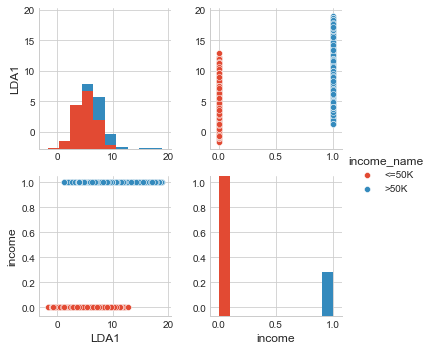

In [38]:
sns.set_style('whitegrid')
sns.pairplot(data_LDA_df.iloc[:,[0,1,2]], hue='income_name')
plt.show()

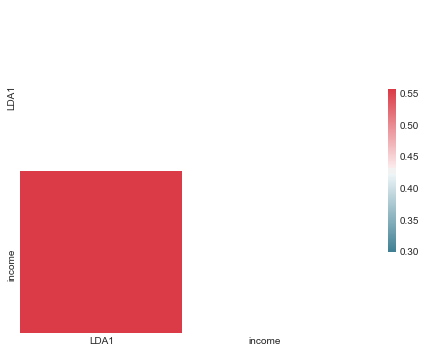

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
mask = np.zeros_like(d_corr_LDA1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d_corr_LDA1,mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

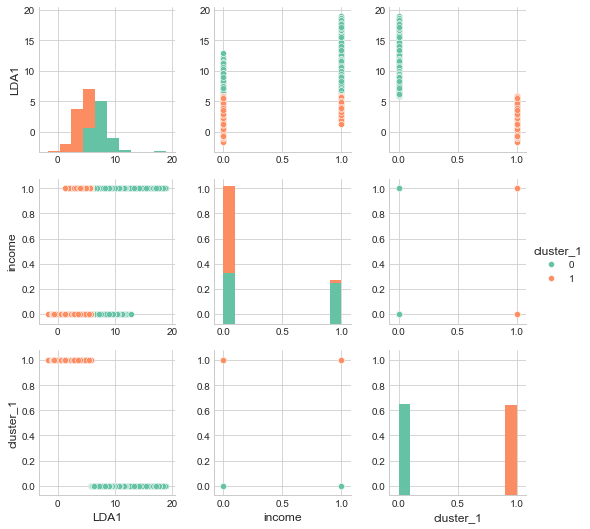

In [40]:
#K=2 K-means
kmeans_model_1 = KMeans(n_clusters=2,random_state=123)
distances_1 = kmeans_model_1.fit_transform(data_LDA_df.iloc[:,0:1])
labels_1 = kmeans_model_1.labels_
data_LDA_df['cluster_1']=labels_1
with sns.color_palette("Set2", 10):
    sns.pairplot(data_LDA_df.iloc[:,[0,1,3]], hue='cluster_1')

In [41]:
#statistics of acceptable_label cluster_1 vs species
tb1 = pd.crosstab(data_LDA_df['income_name'],labels_1)
tb1

col_0,0,1
income_name,,
<=50K,9051,15669
>50K,7337,504


In [42]:
#cluster_1_label
def cluster_1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(2))
    if tb1.iloc[0,alpha] == label_max:
        return '<=50K'
    if tb1.iloc[1,alpha] == label_max:
        return '>50K'
data_LDA_df['cluster_1_label']=data_LDA_df['cluster_1'].apply(cluster_1_label)
data_LDA_df.head()

,LDA1,income,income_name,cluster_1,cluster_1_label
0,6.287984,0,<=50K,0,<=50K
1,7.553536,0,<=50K,0,<=50K
2,5.229785,0,<=50K,1,<=50K
3,5.980359,0,<=50K,0,<=50K
4,7.298290,0,<=50K,0,<=50K


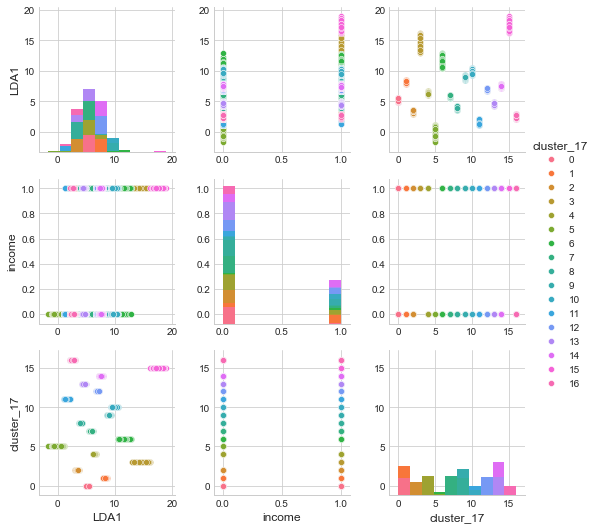

In [43]:
#K=17
kmeans_model_17 = KMeans(n_clusters=17,random_state=123)
distances_17 = kmeans_model_17.fit_transform(data_LDA_df.iloc[:,0:1])
labels_17 = kmeans_model_17.labels_
data_LDA_df['cluster_17']=labels_17
with sns.color_palette("Set2", 10):
    sns.pairplot(data_LDA_df.iloc[:,[0,1,5]], hue='cluster_17')

In [44]:
#compare labels K=17
tb1 = pd.crosstab(data_LDA_df['income_name'],labels_17)
tb1

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
income_name,,,,,,,,,,,,,,,,,
<=50K,2909,857,2267,0,2654,267,34,3059,3004,511,153,787,2045,3187,1431,0,1555
>50K,157,1409,28,62,860,0,337,367,39,1173,779,6,1166,95,1251,95,17


In [45]:
#cluster_17_label
data_LDA_df['cluster_17_label']=data_LDA_df['cluster_17'].apply(cluster_1_label)
data_LDA_df.head()

,LDA1,income,income_name,cluster_1,cluster_1_label,cluster_17,cluster_17_label
0,6.287984,0,<=50K,0,<=50K,4,<=50K
1,7.553536,0,<=50K,0,<=50K,14,<=50K
2,5.229785,0,<=50K,1,<=50K,0,<=50K
3,5.980359,0,<=50K,0,<=50K,7,<=50K
4,7.298290,0,<=50K,0,<=50K,14,<=50K


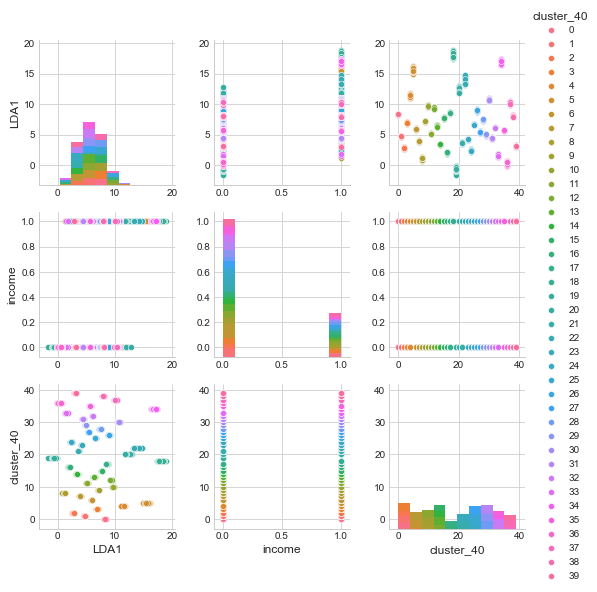

In [46]:
#K=40
kmeans_model_40 = KMeans(n_clusters=40,random_state=123)
distances_40 = kmeans_model_40.fit_transform(data_LDA_df.iloc[:,0:1])
labels_40 = kmeans_model_40.labels_
data_LDA_df['cluster_40']=labels_40
with sns.color_palette("Set2", 10):
    sns.pairplot(data_LDA_df.iloc[:,[0,1,7]], hue='cluster_40')

In [47]:
#compare labels K=40
tb1 = pd.crosstab(data_LDA_df['income_name'],labels_40)
tb1

col_0,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
income_name,,,,,,,,,,,,,,,,,,,,,
<=50K,331,1264,730,973,8,0,1267,1258,188,891,...,26,1354,1182,322,0,1218,133,48,488,865
>50K,673,42,7,541,112,38,177,13,2,560,...,192,37,267,2,49,104,0,291,565,10


In [48]:
#cluster_40_label
data_LDA_df['cluster_40_label']=data_LDA_df['cluster_40'].apply(cluster_1_label)
data_LDA_df.head()

,LDA1,income,income_name,cluster_1,cluster_1_label,cluster_17,cluster_17_label,cluster_40,cluster_40_label
0,6.287984,0,<=50K,0,<=50K,4,<=50K,13,<=50K
1,7.553536,0,<=50K,0,<=50K,14,<=50K,28,<=50K
2,5.229785,0,<=50K,1,<=50K,0,<=50K,11,<=50K
3,5.980359,0,<=50K,0,<=50K,7,<=50K,6,<=50K
4,7.298290,0,<=50K,0,<=50K,14,<=50K,28,<=50K


In [49]:
#find center of K=2
centroids_LDA1 = kmeans_model_1.cluster_centers_
print (centroids_LDA1)

[[ 7.55767366]
 [ 4.12657996]]


In [50]:
#find center of K=17
centroids_LDA17 = kmeans_model_17.cluster_centers_
print (centroids_LDA17)

[[  5.1838152 ]
 [  8.19486213]
 [  3.34596886]
 [ 14.86577901]
 [  6.39393964]
 [  0.45093653]
 [ 11.14095465]
 [  5.81074393]
 [  3.96599656]
 [  8.9178043 ]
 [  9.83738214]
 [  1.72165296]
 [  6.96789631]
 [  4.56801349]
 [  7.54843374]
 [ 17.38371699]
 [  2.62577176]]


In [51]:
data_LDA_df.head()

,LDA1,income,income_name,cluster_1,cluster_1_label,cluster_17,cluster_17_label,cluster_40,cluster_40_label
0,6.287984,0,<=50K,0,<=50K,4,<=50K,13,<=50K
1,7.553536,0,<=50K,0,<=50K,14,<=50K,28,<=50K
2,5.229785,0,<=50K,1,<=50K,0,<=50K,11,<=50K
3,5.980359,0,<=50K,0,<=50K,7,<=50K,6,<=50K
4,7.298290,0,<=50K,0,<=50K,14,<=50K,28,<=50K


In [52]:
d_corr_LDA1=data_LDA_df.iloc[:,[0,3]].corr()
d_corr_LDA1
#Correlation K=2 for dataset after RP

,LDA1,cluster_1
LDA1,1.000000,-0.786719
cluster_1,-0.786719,1.000000


In [53]:
d_corr_LDA17=data_LDA_df.iloc[:,[0,5]].corr()
d_corr_LDA17
#lug_boot and persons

,LDA1,cluster_17
LDA1,1.000000,-0.016159
cluster_17,-0.016159,1.000000


In [54]:
cluster_1_accuracy = len(data_LDA_df[data_LDA_df['income_name']==data_LDA_df['cluster_1_label']])/len(data_LDA_df)
cluster_17_accuracy = len(data_LDA_df[data_LDA_df['income_name']==data_LDA_df['cluster_17_label']])/len(data_LDA_df)
cluster_40_accuracy = len(data_LDA_df[data_LDA_df['income_name']==data_LDA_df['cluster_40_label']])/len(data_LDA_df)
print('K=2 KMeans -> {0:.4f}%'.format(cluster_1_accuracy*100))
print('K=17 KMeans -> {0:.4f}%'.format(cluster_17_accuracy*100))
print('K=40 KMeans -> {0:.4f}%'.format(cluster_40_accuracy*100))

K=2 KMeans -> 75.9190%
K=17 KMeans -> 82.9827%
K=40 KMeans -> 83.0073%


In [55]:
data_LDA_df.head()

,LDA1,income,income_name,cluster_1,cluster_1_label,cluster_17,cluster_17_label,cluster_40,cluster_40_label
0,6.287984,0,<=50K,0,<=50K,4,<=50K,13,<=50K
1,7.553536,0,<=50K,0,<=50K,14,<=50K,28,<=50K
2,5.229785,0,<=50K,1,<=50K,0,<=50K,11,<=50K
3,5.980359,0,<=50K,0,<=50K,7,<=50K,6,<=50K
4,7.298290,0,<=50K,0,<=50K,14,<=50K,28,<=50K


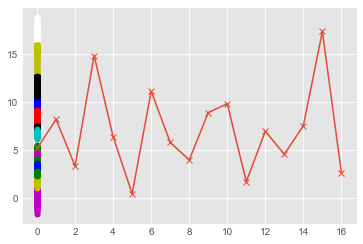

In [131]:
#RP K=17, upon cluster_1
style.use("ggplot")
colors = ["g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w."]
for i in range(len(data_LDA_df)):
    plt.plot(data_LDA_df.iloc[i,0], colors[data_LDA_df.iloc[i,5]], markersize = 10)    
plt.plot(centroids_LDA17[:,0], marker="x")
plt.show()


In [56]:
scanK = pd.DataFrame(data=datalist_label[0:],
                   columns=['income'])
scanK['income_name'] =data.income_name
scanK.head()

,income,income_name
0,0,<=50K
1,0,<=50K
2,0,<=50K
3,0,<=50K
4,0,<=50K


In [57]:
#for loop for K-means 
for i in range(1,100):
    kmeans_model_i = KMeans(n_clusters=i,random_state=123)
    distances_i = kmeans_model_i.fit_transform(data_LDA_df.iloc[:,[0,1]])
    labels_i = kmeans_model_i.labels_
    scanK['cluster_i']=labels_i
    tb1 = pd.crosstab(data['income_name'],labels_i)
    scanK['cluster_i_label']=scanK['cluster_i'].apply(cluster_1_label)
    Ki_accuracy = len(scanK[scanK['income_name']==scanK['cluster_i_label']])/len(scanK)
    print('K=',i,' KMeans -> {0:.4f}%'.format(Ki_accuracy*100))

K= 1  KMeans -> 75.9190%
K= 2  KMeans -> 75.9190%
K= 3  KMeans -> 84.1528%
K= 4  KMeans -> 82.8384%
K= 5  KMeans -> 84.2081%
K= 6  KMeans -> 82.8292%
K= 7  KMeans -> 84.4937%
K= 8  KMeans -> 84.2296%
K= 9  KMeans -> 93.6427%
K= 10  KMeans -> 94.5272%
K= 11  KMeans -> 96.2624%
K= 12  KMeans -> 97.0609%
K= 13  KMeans -> 98.5320%
K= 14  KMeans -> 98.4306%
K= 15  KMeans -> 98.5842%
K= 16  KMeans -> 98.9865%
K= 17  KMeans -> 98.8237%
K= 18  KMeans -> 99.2414%
K= 19  KMeans -> 99.3182%
K= 20  KMeans -> 99.3673%
K= 21  KMeans -> 99.5455%
K= 22  KMeans -> 99.4963%
K= 23  KMeans -> 99.5148%
K= 24  KMeans -> 99.5823%
K= 25  KMeans -> 99.7604%
K= 26  KMeans -> 99.6499%
K= 27  KMeans -> 99.6929%
K= 28  KMeans -> 99.7697%
K= 29  KMeans -> 99.7082%
K= 30  KMeans -> 99.7451%
K= 31  KMeans -> 99.7819%
K= 32  KMeans -> 99.7758%
K= 33  KMeans -> 99.8127%
K= 34  KMeans -> 99.8034%
K= 35  KMeans -> 99.8096%
K= 36  KMeans -> 99.8802%
K= 37  KMeans -> 99.9048%
K= 38  KMeans -> 99.8956%
K= 39  KMeans -> 99.9